<a href="https://colab.research.google.com/github/divyanshukr09/Heart_Disease_Prediction_Machine_Learning/blob/main/India_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
GDP_df = pd.read_csv("/content/India GDP 1960-2022.csv")
GDP_df.head()

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP,Per Capita,Growth
1,0.0,2021,"$3,173.40B","$2,277",8.95%
2,1.0,2020,"$2,667.69B","$1,933",-6.60%
3,2.0,2019,"$2,831.55B","$2,072",3.74%
4,3.0,2018,"$2,702.93B","$1,998",6.45%


In [185]:
GDP_df.shape

(63, 5)

In [186]:
GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     62 non-null     float64
 1   India GDP - Historical Data    63 non-null     object 
 2   India GDP - Historical Data.1  63 non-null     object 
 3   India GDP - Historical Data.2  63 non-null     object 
 4   India GDP - Historical Data.3  63 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.6+ KB


In [187]:
GDP_df.drop(["Unnamed: 0"],axis = 1,inplace=True)
GDP_df.head()

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%


In [188]:
GDP_df.isnull().sum()

India GDP - Historical Data      0
India GDP - Historical Data.1    0
India GDP - Historical Data.2    0
India GDP - Historical Data.3    0
dtype: int64

In [189]:
GDP_df.rename(columns={
        'India GDP - Historical Data' : 'Year', 
        'India GDP - Historical Data.1' : 'GDP', 
        'India GDP - Historical Data.2' : 'Per Capita', 
        'India GDP - Historical Data.3': 'Growth'   
                  }, inplace=True)
GDP_df.head()

,Year,GDP,Per Capita,Growth
0,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%


In [190]:
GDP_df.drop([0],axis = 0,inplace = True)

In [191]:
GDP_df.head()

,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%
5,2017,"$2,651.47B","$1,981",6.80%


In [192]:
GDP_df  = GDP_df.reindex(index=GDP_df.index[::-1])
GDP_df.head()


,Year,GDP,Per Capita,Growth
62,1960,$37.03B,$82,%
61,1961,$39.23B,$85,3.72%
60,1962,$42.16B,$90,2.93%
59,1963,$48.42B,$101,5.99%
58,1964,$56.48B,$116,7.45%


In [193]:
GDP_df['Per Capita'] = GDP_df['Per Capita'].replace('[\$\,\.]', '', regex=True).astype(float)
per_capita = GDP_df['Per Capita']

GDP_df['GDP'] = GDP_df['GDP'].replace('[\$\,\.\"B"]', '', regex=True).astype(int)
GDP_df['GDP'] = GDP_df['GDP']/100
gdp = GDP_df['GDP']
GDP_df

,Year,GDP,Per Capita,Growth
62,1960,37.03,82.0,%
61,1961,39.23,85.0,3.72%
60,1962,42.16,90.0,2.93%
59,1963,48.42,101.0,5.99%
58,1964,56.48,116.0,7.45%
...,...,...,...,...
5,2017,2651.47,1981.0,6.80%
4,2018,2702.93,1998.0,6.45%
3,2019,2831.55,2072.0,3.74%
2,2020,2667.69,1933.0,-6.60%


In [194]:
years = GDP_df['Year'].to_list()
years = list(map(int, years))

# There is one value that is fully string i.e) "%"
# Conversion to "0%" is needed for further processsing 
#GDP_df['Growth'] = GDP_df['Growth'].replace(["%"], ["0%"])

# Growth (%)
# Aim:Convert 3.72% -> 372 -> 3.72
# String -> int -> float 


GDP_df['Growth'] = GDP_df['Growth'].replace('[\"%"\.\""]', '', regex=True)

GDP_df['Growth'] = pd.to_numeric(GDP_df['Growth']) / 100

#GDP_df['Growth'] = GDP_df['Growth'].replace('[\%]', '', regex=True).astype(float)
growth = GDP_df['Growth']

GDP_df

,Year,GDP,Per Capita,Growth
62,1960,37.03,82.0,NaN
61,1961,39.23,85.0,3.72
60,1962,42.16,90.0,2.93
59,1963,48.42,101.0,5.99
58,1964,56.48,116.0,7.45
...,...,...,...,...
5,2017,2651.47,1981.0,6.80
4,2018,2702.93,1998.0,6.45
3,2019,2831.55,2072.0,3.74
2,2020,2667.69,1933.0,-6.60


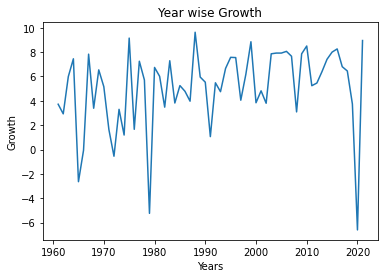

In [195]:
fig,ax = plt.subplots()
ax.plot(years, growth)
plt.xlabel("Years")
plt.ylabel("Growth")
plt.title("Year wise Growth")
plt.show()

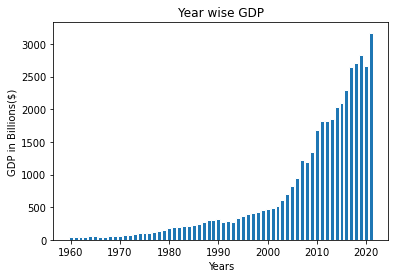

In [196]:
# plot a bar graph for year wise GDP
fig, ax = plt.subplots()
ax.bar(years, gdp, edgecolor="white")
plt.xlabel("Years")
plt.ylabel("GDP in Billions($)")
plt.title("Year wise GDP")
plt.show() 

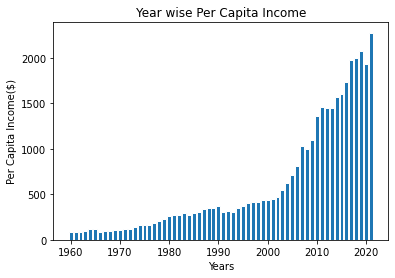

In [197]:
# plot a bar graph for Year wise Per Capita Income
fig, ax = plt.subplots()
ax.bar(years, per_capita, edgecolor="white")
plt.xlabel("Years")
plt.ylabel("Per Capita Income($)")
plt.title("Year wise Per Capita Income")
plt.show()

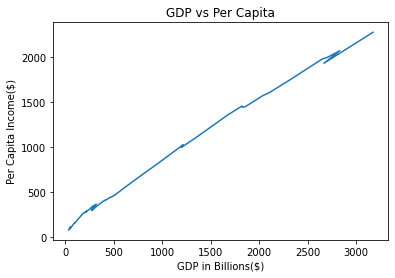

In [198]:
# plot a graph for GDP vs Per Capita
fig, ax = plt.subplots()
ax.plot(gdp, per_capita)
plt.xlabel("GDP in Billions($)")
plt.ylabel("Per Capita Income($)")
plt.title("GDP vs Per Capita")
plt.show()

In [199]:
GDP_df[GDP_df['Growth'] == GDP_df['Growth'].min()]

,Year,GDP,Per Capita,Growth
2,2020,2667.69,1933.0,-6.6


In [200]:
GDP_df[GDP_df['Growth'] == GDP_df['Growth'].max()]

,Year,GDP,Per Capita,Growth
34,1988,296.59,354.0,9.63


In [201]:
GDP_df.sort_values(by=['Growth']).head(5)

,Year,GDP,Per Capita,Growth
2,2020,2667.69,1933.0,-6.60
43,1979,152.99,224.0,-5.24
57,1965,59.55,119.0,-2.64
50,1972,71.46,123.0,-0.55
56,1966,45.87,90.0,-0.06


In [203]:
GDP_df.sort_values(by=['Growth'], ascending=False).head(5)

,Year,GDP,Per Capita,Growth
34,1988,296.59,354.0,9.63
47,1975,98.47,158.0,9.15
1,2021,3173.40,2277.0,8.95
23,1999,458.82,442.0,8.85
12,2010,1675.62,1358.0,8.50
